# Self-Driving Car Engineer Nanodegree

## Project: Build a Traffic Sign Recognition Classifier



## Step 0: Load The Data
First, we load the train and test data from pickle files.

In [1]:
# 1st code cell
# Load pickled data
import pickle

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_raw, y_train_raw = train['features'], train['labels']
X_test_raw, y_test_raw = test['features'], test['labels']



## Step 1: Dataset Summary & Exploration

Let's take a look at the data. The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image

### Data Set Summary

In [2]:
# 2nd code cell
### Data Summary

# Number of training examples
n_train = X_train_raw.shape[0]

# Number of testing examples.
n_test = X_test_raw.shape[0]

# What's the shape of an traffic sign image?
image_shape = (X_train_raw.shape[1], X_train_raw.shape[2])

# How many unique classes/labels there are in the dataset.
n_classes = len( set( y_train_raw ) )

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Data Set Visualization

Let's start with picking some signs out at random and displaying them along with their text labels. And let's see how evenly distributed the labels are.


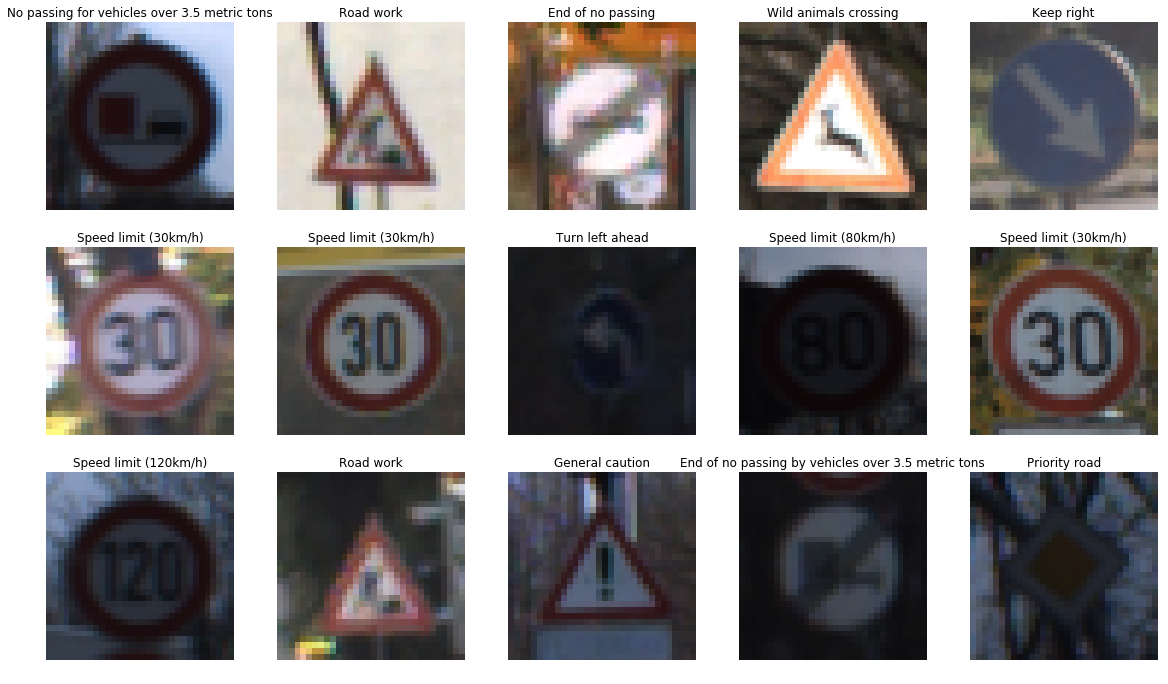

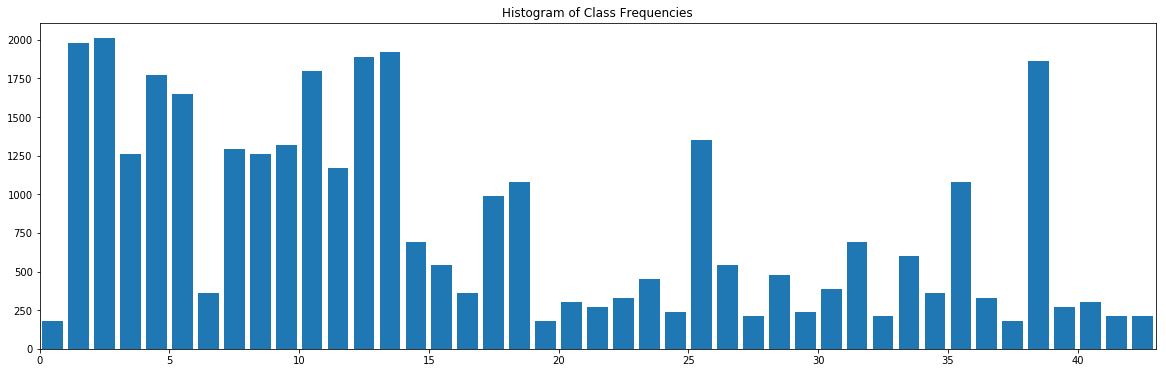

In [3]:
# 3rd code cell
### Data exploration visualization
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
import pandas as pd
import numpy as np

# Read sign names
sn = pd.read_csv('./signnames.csv')

# Plot 15 signs at random
fig = plt.figure(figsize=(20,20))
for i in range(1,16):
    a = fig.add_subplot(5,5,i)
    signidx = randint(0, n_train)
    plt.imshow(X_train_raw[signidx])
    code = int(y_train_raw[signidx])
    plt.title( sn.iloc[code, 1] )
    plt.axis('off')
    
# Plot histogram of class frequency
histogram = np.histogram(y_train_raw, bins=n_classes, range=(0, n_classes))
fig = plt.figure(figsize=(20,6))
bin_edges = histogram[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
plt.bar(bin_centers, histogram[0])
plt.xlim(0, n_classes)
plt.title('Histogram of Class Frequencies')



Not very even, but this might reflect actual world occuring frequencies.


## Step 2: Design and Test a Model Architecture

Let's learn from this data set.


### Preprocess the Data Set (normalization, grayscale, etc.)

First, we shuffle the training data. Then we normalize the brightness.


 Before and after normalisation: 


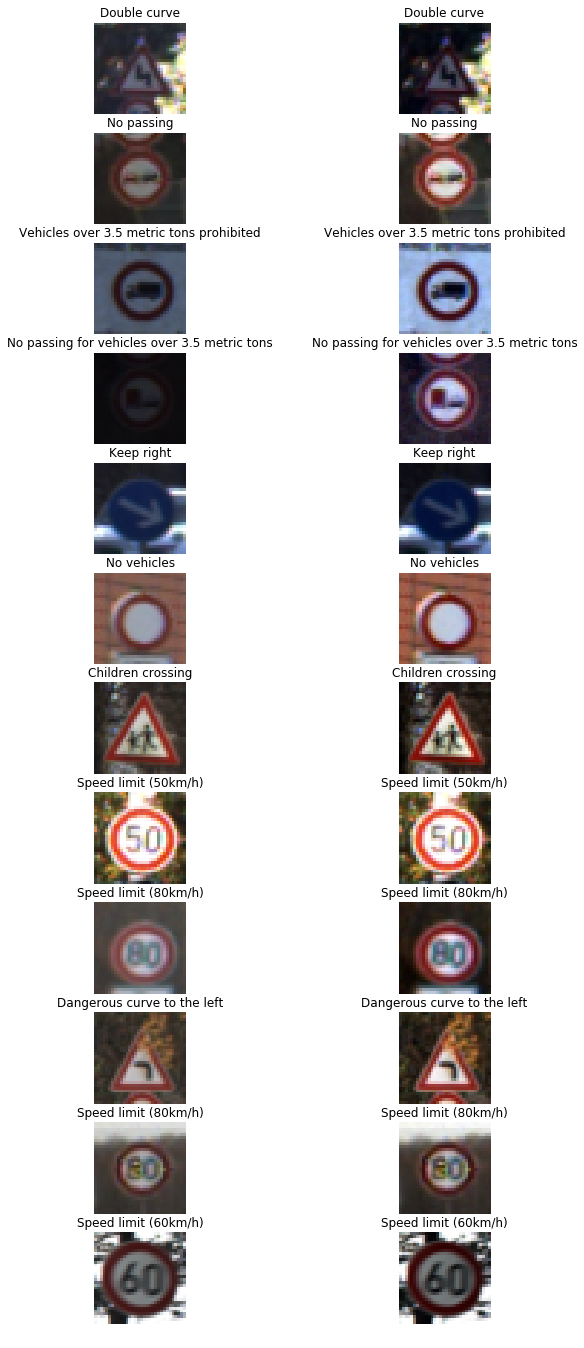

In [4]:
# 4th code cell
### Preprocess the data.
from sklearn.utils import shuffle
from skimage.exposure import rescale_intensity
import cv2 

# Shuffle
X_train_shuffled, y_train_shuffled = shuffle( X_train_raw, y_train_raw )

# Define preprocessing
def preprocess_images( X_train_in, y_train_in ):
    # Normalise
    X_train = []
    y_train = []
    for i, (image, label) in enumerate( zip( X_train_in, y_train_in ) ):
        zeros = np.zeros((32,32,3))
        normalised_image = cv2.normalize(image, zeros, alpha=0.0, beta=1.0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        X_train.append( normalised_image )
        y_train.append( label )
    return np.array( X_train ), y_train

# Preprocess
X_train, y_train = preprocess_images( X_train_shuffled, y_train_shuffled )

# Plot 25 signs at random, before and after
print( " Before and after normalisation: " )
fig = plt.figure(figsize=(10,30))
for i in range(1,25, 2):
    signidx = randint(0, n_train)

    a = fig.add_subplot(15,2,i)
    plt.imshow(X_train_shuffled[signidx])
    code = int(y_train_shuffled[signidx])
    plt.title( sn.iloc[code, 1] )
    plt.axis('off')

    a = fig.add_subplot(15,2,i+1)
    plt.imshow(X_train[signidx])
    code = int(y_train[signidx])
    plt.title( sn.iloc[code, 1] )
    plt.axis('off')




### Split Data into Training, Validation and Testing Sets

In [5]:
# 5th code cell
### Split the data into training/validation sets.
from sklearn.model_selection import train_test_split

# Split. Let's say 20% of the data goes to validation.
X_train, X_validation, y_train, y_validation = train_test_split( X_train, y_train, test_size=0.2, random_state=0)

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples.
n_validation = X_validation.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of test examples =", n_test)



Number of training examples = 27839
Number of validation examples = 6960
Number of test examples = 12630


In [6]:
# 6th code cell
# Jitter some classes

print( "" )
print( "We can see many classes have fewer than 10% of other classes in numbers of signs:")
print( "" )
print( histogram[0] )
print( "" )
print( "Very unbalanced. So let's fix this by augmenting all classes with fewer than 50% of max with jittered images.")

min = max( histogram[0]) * 0.5
print( "" )
print( histogram[0] < min )

def jitter( X_train_in, y_train_in ):
    X_jittered = []
    y_jittered = []
    for i, (image, label) in enumerate( zip( X_train_in, y_train_in ) ):
        X_jittered.append( normalised_image )
        y_jittered.append( label )
    return np.array( X_train ), y_train




We can see many classes have fewer than 10% of other classes in numbers of signs:

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]

Very unbalanced. So let's fix this by augmenting all classes with fewer than 50% of max with jittered images.

[ True False False False False False  True False False False False False
 False False  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True]


### Model Architecture
And now, we define the model architecture. Let's start of with an adapted LeNet model, and improve it from there.

In [7]:
# 7th code cell
from tensorflow.contrib.layers import flatten

# Define the model
def LeNet(x):
    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # ReLU Activation
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # ReLU Activation
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # ReLU Activation
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # ReLU Activation
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    # That's it
    return logits


### Train, Validate and Test the Model

Let's train. Let's try 10 epochs, and 128 batch size. We hope for accuracy > 95%.

In [8]:
#8th code cell
### Train
import tensorflow as tf

EPOCHS = 5
BATCH_SIZE = 128
rate = 0.001

# Inputs
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# TF Operations
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Let's save when done
saver = tf.train.Saver()

# Evaluate the model on a data set
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        # Evaluate
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.782

EPOCH 2 ...
Validation Accuracy = 0.911

EPOCH 3 ...
Validation Accuracy = 0.945

EPOCH 4 ...
Validation Accuracy = 0.959

EPOCH 5 ...
Validation Accuracy = 0.964

Model saved


## Tweaking

Nice, 95% validation accuracy.


In [9]:
# 9th code cell
# Tweak

# Adjust...


## Test
Now that we've finished tweaking our model, let's finally run it on the test set to see how well it does.

In [10]:
# 10th code cell
# Test. Run when done.
#with tf.Session() as sess:
#    # Load model
#    saver.restore(sess, tf.train.latest_checkpoint('.'))
#    
#    # Evaluate test data
#    X_test, y_test = preprocess( X_test_raw, y_test )
#    test_accuracy = evaluate(X_test, y_test)
#    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

---

## Step 3: Test a Model on New Images

To get more insight into how the model is working, I've downloaded new images by screenshotting images of German traffic signs from Google Street View in Berlin and downloading from Google Image Search.

### Load and Output the Images

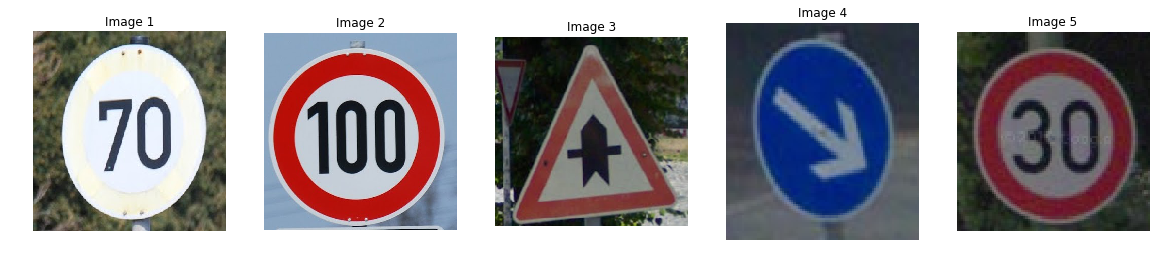

In [11]:
# 11th code cell
# New Images
import glob

# Find and read images in test directory
filelist = glob.glob( './test/*.*' )
images = np.array([np.array(plt.imread(fname)) for fname in filelist])

# Plot 10 in a row
fig = plt.figure(figsize=(20,20))
for i in range(0,len(images)):
    a = fig.add_subplot(1,len(images),i+1)
    plt.imshow(images[i])
    code = int(y_train[1])
    plt.title( "Image " + str(i+1) )
    plt.axis( "off" )

### Predict the Sign Type for Each Image

[ 4  1 11 38  1]


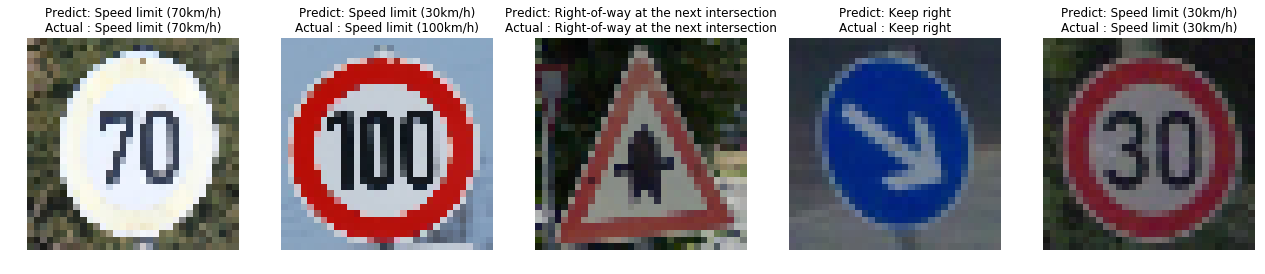

In [30]:
# 12th code cell
### Run the predictions and use the model to output the prediction for each image.

# What are the actual sign labels?
y_correct = [ 4, 7, 11, 38, 1 ]

# Find and read images in test directory
filelist = glob.glob( './test/*.*' )
images = [ cv2.imread(filename) for filename in filelist ]
images = [ cv2.cvtColor( image, cv2.COLOR_BGR2RGB ) for image in images ]

# Resize to 32x32 for model
images = np.array( [ cv2.resize( image, (32, 32) ) for image in images ] )

# Predict with model
with tf.Session() as sess:
    # Load model
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # Predict
    preds = sess.run(tf.argmax(logits, 1), feed_dict={x:images})
    print( "Predipreds )

# Read sign names
sn = pd.read_csv('./signnames.csv')

# Plot
fig = plt.figure(figsize=(22,20))
for i in range(0,len(images)):
    a = fig.add_subplot(2,len(images),i+1)
    plt.imshow(images[i])
    code = preds[i]
    plt.title( "Predict: " + str( sn.iloc[code, 1] ) + "\nActual : " + str( sn.iloc[y_correct[i], 1] ) )
    plt.axis("off")


### Analyze Performance

In [13]:
# 13th code cell
### Calculate the accuracy for the new images. 


# Find and read images in test directory
filelist = glob.glob( './test/*.*' )
images = np.array([np.array(plt.imread(fname)) for fname in filelist])

with tf.Session() as sess:
    # Load model
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # Predict
    accuracy = sess.run(accuracy_operation, feed_dict={x: images, y: y_correct})
    print( accuracy )





ValueError: setting an array element with a sequence.

### Model Confidence: Top 5 Softmax Probabilities

Let's see how *confident* the model is on these new images. Just how sure of them are you?

In [ ]:
# 14th code cell
### Print out the top five softmax probabilities

with tf.Session() as sess:
    # Load model
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    sess.run(tf.nn.top_k(tf.constant(logits), k=3))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

Nice, a working traffic sign classifier!

By Tom Jacobs
